#5th Fine-tune implemented on DialoGPT-medium Language Model  (https://huggingface.co/Komala/HPv5_DialoGPT-medium) on the  <big>Improved & Tokenized </big> conversational  dataset of Harry Potter Character chosen from the Harry Potter and the Philosopher's Stone (film)

##<b>Available @ https://huggingface.co/Komala/HPv5_DialoGPT-medium
Model Name: Komala/HPv5_DialoGPT-medium </b>
###SPACED DATA FORMAT. Trained with epochs=3
QA format of Dialog Dataset formed utilizing the following Open Data Resources<br/>
<b>1. Story outline from Wikipedia.org</b>
 https://en.wikipedia.org/wiki/Harry_Potter_and_the_Philosopher%27s_Stone_(film)<br/>
<b>2. Transript from warnerbros.fandom.com Website</b>
https://warnerbros.fandom.com/wiki/Harry_Potter_and_the_Philosopher%27s_Stone/Transcript
<br/>
<b>3. Full Story and scenes screenplay from J. K. Rowling's original Storybook from free online Book</b>
https://kalyankrishna4886.wordpress.com/wp-content/uploads/2013/09/harry-potter-book-collection-1-4.pdf


# Installed the required packages:
<div align='justify'>
<b>Installed the upgraded version of Hugging Face platforms' "transformers" library along with the "accelerate" library, both for use with PyTorch. Also, Installed  "huggingface-hub" and "datasets".</b><br/>


1) <b>transformers</b> library provides state-of-the-art pre-trained models for natural language processing (NLP) tasks, such as text classification, language modeling, translation, and more. It also includes utilities for fine-tuning and customizing these models for specific tasks.
<br/>
2) <b>accelerate</b> is a library developed by Hugging Face. It provides utilities for efficient distributed training of PyTorch models. It is installed mainly to perform training of large models on multiple GPUs or across multiple machines.
Thus, installing both transformers and accelerate are especially useful for training large NLP models efficiently. <br/>
3) <b>huggingface-hub</b> library provides the Hugging Face Hub for accessing their platform, allowing users to push fine-tuned models under their login using privileged access, by providing their login's write TokenID to push the fine-tuned model<br/>
4) <b> datasets</b> package streamlines the process of accessing, preprocessing, and using datasets in conjunction with LLMs, contributing to a more efficient and standardized workflow in natural language processing tasks. The package includes functionality for preprocessing datasets, such as tokenization, batching, and data augmentation. These preprocessing steps are crucial for preparing the data to be fed into LLMs during training.
</div>

In [ ]:
!pip install transformers[torch] accelerate -U

In [ ]:
!pip install datasets

In [ ]:
!pip install huggingface-hub

#STEP1: Reading cleaned conversational datasets from CSV file

In [ ]:
#Imported pandas and numpy python libraries to read the .csv file content with specific encoding
import pandas as pd
import numpy as np
# The new Improved Conversational data loaded from the CSV file
file_path = "HP_dialogdataset.csv"
# Read the CSV file with different encodings
encodings_to_try = ['utf-8', 'ISO-8859-1', 'latin1']
encoding_var=''
for encoding in encodings_to_try:
    try:
        print("Encoding: ",encoding )
        chat_df = pd.read_csv(file_path, encoding=encoding)
        encoding_var = encoding
        break # Stop trying when found successful encoding
    except UnicodeDecodeError:
        print(f"Failed to decode using {encoding} encoding. Trying another.")

#  Printed the DataFrame
print(chat_df.head())
#Encoding ISO-8859-1 is successfuly running

Encoding:  utf-8
Failed to decode using utf-8 encoding. Trying another.
Encoding:  ISO-8859-1
   Chapter User_Bot                                             Dialog
0        0    User:                                                 Hi
1        0   Harry:  Hi there! I am Harry. Harry Potter. How can I ...
2        0    User:                                          Hi, Harry
3        0   Harry:  Hi there! I am Harry. Harry Potter. How can I ...
4        0    User:                                              Hello


#Preliminary Data Exploration
<big> HP_dialogdataset.csv is a dialog Dataset. It contains three columns: 1) "Chapter" number, 2) "User_Bot" labels and 3) "Dialog" contains the dialogs of 2 labels "User" and "Bot". "User_Bot" and  "Dialog" are string columns </big>

In [ ]:
chat_df.shape

(1730, 3)

In [ ]:
chat_df.describe()

,Chapter
count,1730.000000
mean,18.254335
std,31.686142
min,0.000000
25%,0.000000
50%,7.000000
75%,14.000000
max,100.000000


# STEP2: DATA PRE-PROCESSING: Checking missing values, removed duplicates and Formatting the Dataset according to DialoGPT-Medium Model's Data Template

###Reviewed user and bot responses to ensure relevance for all queries. Verified the balance of the String categorical value through below graph on“User:” “Harry:” labels of the User_Bot Column using the value_counts() functions.


<Axes: xlabel='User_Bot', ylabel='count'>

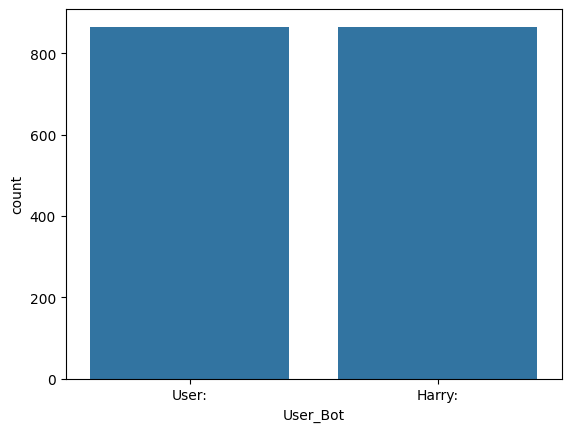

In [ ]:
# imported seaborn package for displaying the graph on User vs Bot Dialog count
import seaborn as sb
sb.countplot(chat_df, x ="User_Bot")
#USERR'S QUERY AND HARRY POTTER'S RESPONSE DIALOGS ARE HAVING BALANCED COUNT WHICH IS IMPORTANT TO ENSURE BEFORE PROCEEDING MODEL FINE-TUNING

In [ ]:
#Checking the missing or Null values in the dataframe
chat_df.isnull().sum()
# No missing or Null values

Chapter     0
User_Bot    0
Dialog      0
dtype: int64

In [ ]:
chat_df[chat_df.isnull().any(axis=1)]

,Chapter,User_Bot,Dialog


# No missing or Null values

# Merging the Label and Dialog with single space.

In [ ]:
# Selected only relevant columns that is the 'User_Bot', 'Dialog' to form chat dataset
chat_df = chat_df[['User_Bot', 'Dialog']]

# Merged the 'User or Bot' and 'Dialog' columns into a single column
chat_df['Merged'] = chat_df['User_Bot'] + ' ' + chat_df['Dialog']
chat_df.head(100)

,User_Bot,Dialog,Merged
0,User:,Hi,User: Hi
1,Harry:,Hi there! I am Harry. Harry Potter. How can I ...,Harry: Hi there! I am Harry. Harry Potter. How...
2,User:,"Hi, Harry","User: Hi, Harry"
3,Harry:,Hi there! I am Harry. Harry Potter. How can I ...,Harry: Hi there! I am Harry. Harry Potter. How...
4,User:,Hello,User: Hello
...,...,...,...
95,Harry:,"Hermione, despite our earlier disagreements, p...","Harry: Hermione, despite our earlier disagreem..."
96,User:,Who is Dudley? What kind of person Dudley is?,User: Who is Dudley? What kind of person Dudle...
97,Harry:,Dudley is my cousin. But my relationship with ...,Harry: Dudley is my cousin. But my relationshi...
98,User:,Can you share a moment when your friendship wi...,User: Can you share a moment when your friends...


##Now, Concatenating the "User Query" and "Response Dialog" with single space stored and in a new dataframe with column named as "full_sequence".
Thus, this forms a dataset that comprises  pairs of "User Query" (Question) and "Response Dialogs" (Answer) in a row, presented sequentially as follows.

In [ ]:
# Now, Merged the User Query and Response Dialog with single space stored in the new column named as "full_sequence"
import pandas as pd
# Initialized an empty DataFrame to store concatenated dialogues
full_sequence_data= []
# Iterated over the rows of chat_df
for i in range(0, len(chat_df), 2):
    # Concatenated dialogues from current row(User Query) and the next row(Response Dialog)
    str_query = chat_df.iloc[i]['Merged']
    str_response = chat_df.iloc[i+1]['Merged']
    full_sequence = str_query.strip() + ' ' + str_response.strip()

    # Stored the results in a dictionary
    full_sequence_data.append(full_sequence)

# Created a new DataFrame to store the full_sequence_data formed by concatenating dialogues
NewChat_df = pd.DataFrame(full_sequence_data, columns=['full_sequence'])
# Displayed new dataframe content
NewChat_df.head(30)

,full_sequence
0,User: Hi Harry: Hi there! I am Harry. Harry Po...
1,"User: Hi, Harry Harry: Hi there! I am Harry. H..."
2,"User: Hello Harry: Hi, Hello. I am Harry.. Har..."
3,"User: Hi, how are you? Harry: I'm good, thanks..."
4,User: Are you ok? Harry: I am good. Thanks. Ho...
5,User: I am fine. Thanks. Harry: Good. How can ...
6,"User: Are you Harry Potter? Harry: Yes, I am H..."
7,"User: Harry Potter, could you say your story s..."
8,"User: Who are your relatives, Harry? Harry: My..."
9,"User: Who are your friends, Harry? Harry: My b..."


##Above shows the dataframe containing Concatenated Conversations[ "User Query" and "Response Dialog" ] put into single column of a dataframe.

## Removed Duplicate rows

In [ ]:
# Removed Duplicate rows
import pandas as pd

# Removed Duplicate rows from the NewChat_df DataFrame
NewChat_df.drop_duplicates(inplace=True)

In [ ]:
# Displaying the size of the Dataframe. Total Number of rows and columns. Total 865 rows with One column
NewChat_df.shape

(865, 1)

#STEP3: Instantiated Model, Tokenizer and Data Collector for Fine-tuning DialoGPT Model
### GPT2LMHeadModel and GPT2Tokenizer  packages are  used  to explicitly control over model and tokenizer instantiation Since the DialoGPT Model is going to be used for fine-tuning
### Instantiating the Pre-trained model "microsoft/DialoGPT-medium" using the GPT2LMHeadModel and GPT2Tokenizer libraries. Setting the Dialog Dataset using TextDataset &  DataCollatorForLanguageModeling libraries

In [ ]:
# Imported  GPT2LMHeadModel, GPT2Tokenizer for Instantiating the Pretrained model "microsoft/DialoGPT-medium"
#Importing the TextDataset & DataCollatorForLanguageModeling libraries for Setting the Dialog Dataset
from transformers import GPT2LMHeadModel, GPT2Tokenizer, TextDataset, DataCollatorForLanguageModeling

# Importing the Trainer, TrainingArguments packages for Model Fine Tuning
from transformers import Trainer, TrainingArguments
# from datasets import Dataset

# Loading pretrained model and tokenizer
model_name ="microsoft/DialoGPT-medium"
gpt_model = GPT2LMHeadModel.from_pretrained(model_name)
gpt_tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Adding padding token
gpt_tokenizer.pad_token = gpt_tokenizer.eos_token  # Using the end-of-sequence token as the padding token

#Specifying the output directory for pushing in my Huggling Face login as "HPv5_DialoGPT-medium/"
output_dir = "HPv5_DialoGPT-medium/"
# Creating  the output directory in colab, if it doesn't exist
import os
os.makedirs(output_dir, exist_ok=True)

# DataCollatorForLanguageModeling used for handling padding and collating data samples into batches
data_collator = DataCollatorForLanguageModeling(tokenizer=gpt_tokenizer, mlm=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


## User defined function for tokenizing conversational dataset before performing language model fine-tuning

In [ ]:
#User defined function for tokenizing conversational dataset before performing language model fine-tuning
def tokenize_function(examples):
    return gpt_tokenizer(examples["full_sequence"], truncation=True)

#STEP4: Converting the Pandas dataframe into Hugging face Dataset for data compatibility, for doing tokenizing before performing Model fine-tuning

In [ ]:
# Imported the "datasets" package from the Hugging Face for
# Converting the Pandas dataframe  into Hugging face Dataset for tokenizing before performing model fine-tuning
from datasets import Dataset
import pandas as pd
# Converting DataFrame to Hugging Face Dataset
chat_dataset = Dataset.from_pandas(NewChat_df)
# Splited the dataset into test and train datasets
chat_dataset = chat_dataset.train_test_split(test_size=0.2, seed=42)
chat_dataset

DatasetDict({
    train: Dataset({
        features: ['full_sequence'],
        num_rows: 692
    })
    test: Dataset({
        features: ['full_sequence'],
        num_rows: 173
    })
})

#STEP5: Tokenized both TRAIN and TEST datasets.
###THOUGH THE DATASET WAS SPLIT BEFORE FINE-TUNING. THE FINE-TUNED MODEL GAVE MORE HALLICINATED RESPONSES DUE TO LESS TRAINING DATA. HENCE, THE TRAIN AND TEST DATASETS WERE COMBINED INTO A SINGLE DATASET AND ALLOCATED AS "train_dataset" PARAMETER IN THE TRAINER ARGUMENT DURING MODEL FINE-TUNING. THUS, THIS PROVIDED ENOUGH CONVERSATIONAL DIALOG COVERING THE STORY NUANCES AND DIVERSE RESPONSES TO THE TRAINED MODEL.
Tokenize Code Concept Reference: https://discuss.huggingface.co/t/evaluating-finetuned-bert-model-for-sequence-classification/5265

In [ ]:
# Tokenized both training and Test datasets using the userdefined function "tokenize_function"
#by mapping to the 2 batches of the "chat_dataset"
tokenized_chat_dataset = chat_dataset.map(tokenize_function, batched=True)
from datasets import concatenate_datasets
# Concatenated tokenized datasets into a single Dataset object
tokenized_full_dataset = concatenate_datasets([tokenized_chat_dataset["train"], tokenized_chat_dataset["test"]])

Map:   0%|          | 0/692 [00:00<?, ? examples/s]

Map:   0%|          | 0/173 [00:00<?, ? examples/s]

In [ ]:
# Viewing the first few rows of tokenized_train Dataset
print("Tokenized Train Dataset:")
print(tokenized_chat_dataset["train"][:5])

Tokenized Train Dataset:
{'full_sequence': ["User: What is the purpose of the Philosopher's Stone mentioned in the story? Harry: The Philosopher's Stone is a magical object that can turn metal into gold and produce an immortality elixir. It is guarded by Fluffy, the giant three-headed dog.", 'User: What makes Gryffindor more special to you, Harry? Harry: Gryffindor is special because it brought me the best friends I could ever ask for. I, Ron and Hermione faced danger together. That bond we share is unbreakable.', 'User: Who is Draco Malfoy? Harry: Draco Malfoy is a fellow student at Hogwarts. He is in Slytherin House.  Me and Malfoy have a bit of a rivalry. Malfoy is always trying to outperform me, especially in the Quidditch field.', "User: What should we do to prevent Voldemort's return? Harry: Oh! Well, To prevent Voldemort's return we must remain vigilant and united against him. Naming him Voldemort instead of You-Know-Who is the first step in facing our fears and standing up to h

In [ ]:
# # View the first few rows of tokenized_eval Dataset
# print("\nTokenized Eval Dataset:")
# print(tokenized_eval[:5])

In [ ]:
#importing notebook_login from huggingface_hub forlogging into Hugging Face Hub before pushing the Trained Model
from huggingface_hub import notebook_login
notebook_login()
# Given the Write Token ID

#STEP6: Instantiating the DialoGPT-Medium Model Fine-Tuning
##with Hyperparameters epochs=3, per_device_train_batch_size=6, save_steps=1000 and save_total_limit=2, prediction_loss_only=True,  
<b>epochs</b>: hyperparameter specifies the number of times the entire dataset will be passed through the model during training.<br/>

<b>per_device_train_batch_size</b> hyperparameter defines the number of training examples processed simultaneously on each device (e.g., GPU or CPU) during training.  Increasing batch size for more diverse examples<br/>

<b>save_steps</b> hyperparameter determines how often (after how many training steps) the model's parameters are saved during training.<br/>

<b>save_total_limit=2</b>hyperparameter sets the maximum number of saved checkpoints/models to keep during training. If exceeded, the oldest checkpoints will be deleted to make space for new ones.<br/>
<b>prediction_loss_only=True:</b> only the loss related to the prediction task will be computed and displayed.
###STEP3: DialoGPT-Medium Model Fine-Tuning for "Komala/HPv5_DialoGPT-medium" Creating a data collator for Large Language modeling, Setting up the training arguments with specific values to the hyperparameter and Creating the Trainer for Model Fine-tuning

In [ ]:
# Create a data collator for language modeling
## DataCollatorForLanguageModeling handles padding and
#collating data samples into batches
data_collator = DataCollatorForLanguageModeling(
    tokenizer=gpt_tokenizer,
    mlm=False  # We're not doing masked language modeling hence set False
)

# Setting up training arguments to set values to the Model's Hyperparameters for enhanced training
training_args = TrainingArguments(
    output_dir=output_dir, # "HPv5_DialoGPT-medium/"
    overwrite_output_dir=True, # Enabling the overwrting of the output directory
    num_train_epochs=3,
    per_device_train_batch_size=6,   # Increasing batch size for more diverse examples
    save_steps=1000,
    save_total_limit=2,
    prediction_loss_only=True, #only the loss related to the prediction task will be computed and displayed.
    push_to_hub = True,
    learning_rate=5e-5,  # learning rate
)

# Created the Trainer. Specified the pre-trained base Model, Dataset(data colletor and training dataset) and
# the Trainer Arguments(Model's hyperparameters )
trainer = Trainer(
    model=gpt_model,
    args=training_args,
    data_collator=data_collator,
    train_dataset = tokenized_full_dataset,
)
# Initiated(Started) the model Fine-tuning
trainer.train()

Step,Training Loss


TrainOutput(global_step=435, training_loss=2.2121932808010056, metrics={'train_runtime': 10181.2561, 'train_samples_per_second': 0.255, 'train_steps_per_second': 0.043, 'total_flos': 422780107972608.0, 'train_loss': 2.2121932808010056, 'epoch': 3.0})

#STEP7: Pushing the fine-tuned model's trainer into the Hugging Face Hub
Available @ https://huggingface.co/Komala/HPv5_DialoGPT-medium
Model Name: Komala/HPv5_DialoGPT-medium

In [ ]:
#Pushing the fine-tuned model's trainer into the Hugging Face Hub
trainer.push_to_hub()

events.out.tfevents.1710446890.95e56d6711ed.4865.0:   0%|          | 0.00/4.80k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Upload 6 LFS files:   0%|          | 0/6 [00:00<?, ?it/s]

events.out.tfevents.1710450267.95e56d6711ed.22460.1:   0%|          | 0.00/4.80k [00:00<?, ?B/s]

events.out.tfevents.1710450321.95e56d6711ed.22460.2:   0%|          | 0.00/5.16k [00:00<?, ?B/s]

events.out.tfevents.1710450207.95e56d6711ed.22460.0:   0%|          | 0.00/4.80k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/4.92k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Komala/HPv5_DialoGPT-medium/commit/39672cc9a43f4010d605801d35475057bf0b368f', commit_message='End of training', commit_description='', oid='39672cc9a43f4010d605801d35475057bf0b368f', pr_url=None, pr_revision=None, pr_num=None)

#STEP8: Saving the model's trainer for local runs

In [ ]:
# Saving the model  trainer
trainer.save_model()

In [ ]:
#Zipped the fine-tuned model folder for future local runs
!zip -r fine-tuned-dialogpt-medium20240314.zip ./fine-tuned-dialogpt-medium20240314


In [ ]:
#downlaoded the fine-tuned model folder for future local runs
from google.colab import files
files.download('fine-tuned-dialogpt-medium.zip')